In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

DATA_DIR = os.path.join("data" , "guitar_sample")

# Classifying sounds using Deep Learning

## 1 Data Exploration and Visualisation

### Visual inspection

We will load a sample from each class and visually inspect the data for any patterns. We will use librosa to load the audio file into an array then librosa.display and matplotlib to display the waveform. 

In [5]:
# Load imports

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

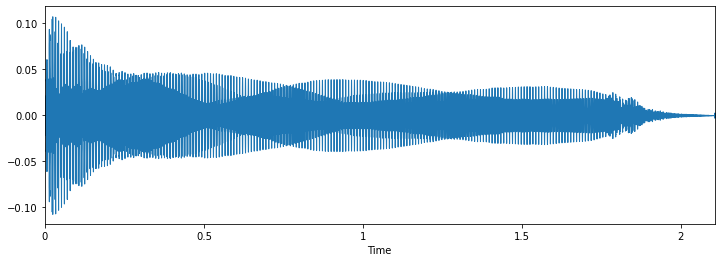

In [6]:
# Class: Air Conditioner

filename = os.path.join(DATA_DIR, "A", "A1.wav")
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

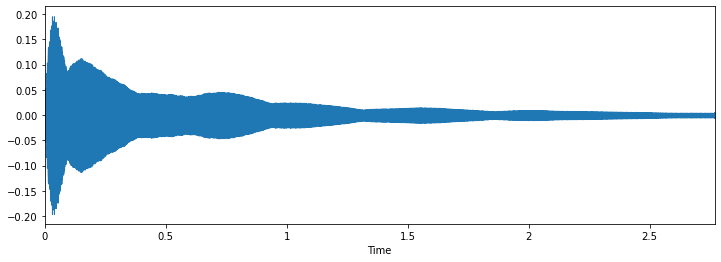

In [12]:
# Class: Car horn 

filename = os.path.join(DATA_DIR, "B", "B1.wav")
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

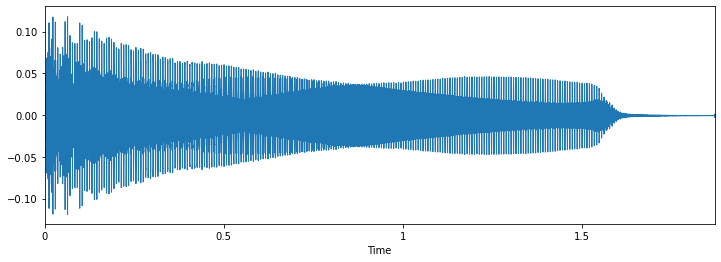

In [11]:
# Class: Children playing 

filename = os.path.join(DATA_DIR, "D", "D1.wav")
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

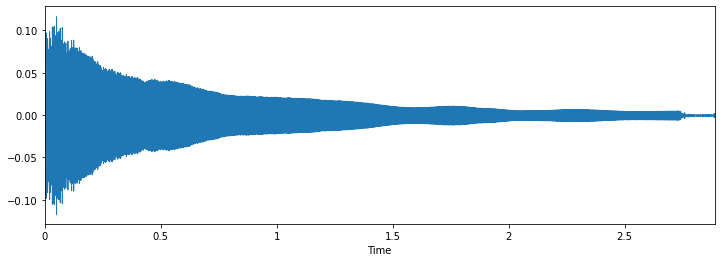

In [16]:
# Class: Dog bark

filename = os.path.join(DATA_DIR, "E", "E1.wav")
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

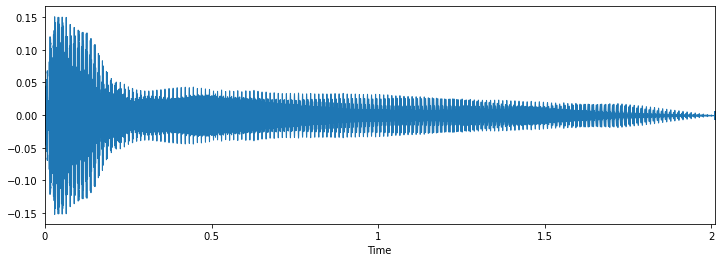

In [17]:
# Class: Drilling

filename = os.path.join(DATA_DIR, "EH", "E1.wav")
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

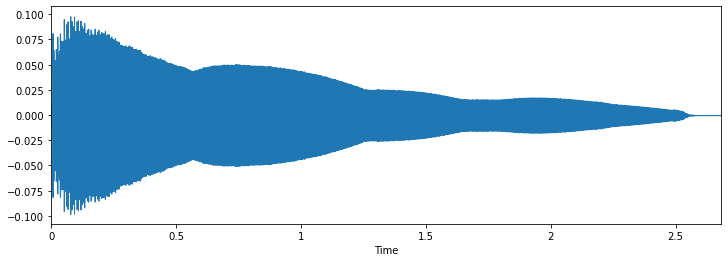

In [18]:
# Class: Engine Idling 

filename = os.path.join(DATA_DIR, "G", "G1.wav")
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

### Audio sample file properties

Next we will iterate through each of the audio sample files and extract, number of audio channels, sample rate and bit-depth. 

In [22]:
# Load various imports 
import pandas as pd
import os
import librosa
import librosa.display

from wavfilehelper import WavFileHelper
wavfilehelper = WavFileHelper()

audiodata = []
for folder in os.listdir(DATA_DIR):
    for file in os.listdir(os.path.join(DATA_DIR, folder)):
        data = wavfilehelper.read_file_properties(os.path.join(DATA_DIR, folder, file))
        audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

### Audio channels 

Most of the samples have two audio channels (meaning stereo) with a few with just the one channel (mono). 

The easiest option here to make them uniform will be to merge the two channels in the stero samples into one by averaging the values of the two channels. 

In [23]:
# num of channels 

print(audiodf.num_channels.value_counts(normalize=True))

1    1.0
Name: num_channels, dtype: float64


### Sample rate 

There is a wide range of Sample rates that have been used across all the samples which is a concern (ranging from 96k to 8k).

This likley means that we will have to apply a sample-rate conversion technique (either up-conversion or down-conversion) so we can see an agnostic representation of their waveform which will allow us to do a fair comparison. 

In [24]:
# sample rates 

print(audiodf.sample_rate.value_counts(normalize=True))

44100    1.0
Name: sample_rate, dtype: float64


### Bit-depth 

There is also a wide range of bit-depths. It's likely that we may need to normalise them by taking the maximum and minimum amplitude values for a given bit-depth. 

In [25]:
# bit depth

print(audiodf.bit_depth.value_counts(normalize=True))

24    1.0
Name: bit_depth, dtype: float64


### Other audio properties to consider 

We may also need to consider normalising the volume levels (wave amplitude value) if this is seen to vary greatly, by either looking at the peak volume or the RMS volume. 

### *In the next notebook we will preprocess the data*